Lütfen önce Gül ve Yağ verisetini dosyalara ekleyiniz.

**Gül Veriseti ile Sınıflandırma**

In [ ]:
import pandas as pd
dataset = pd.read_excel('gul_vize.xlsx') #excel dosyasını okuyoruz
dataset #verisetine dair görünüm

,Bu kez tatlı ve hoşgörülü bir gülümsemeyle Siz de görüyorsunuz ki dedi,G2
0,Sonra da kahkahalarla gülmeye başladı,G2
1,Aynı şekilde onlara Küçük prensin güler yüzlü...,G2
2,Fil sürüsü fikri onu çok güldürdü,G2
3,Eğer bu bitki yalnızca bir turp ya da bir gül ...,G1
4,yoksa bir süre sonra iyice gül fidelerine benz...,G1
...,...,...
1505,Seni sersem dedi bana tatlı tatlı gülümseyerek,G2
1506,Ellerinizle aşağıdaki nesneleri tuttuğunuzu ve...,G1
1507,Kestane ve gül kokuyordu bu yatak bir de nane ...,G1
1508,Boğazım yanıyordu kalktım yutkunarak pencere...,G2


In [ ]:
dataset.to_csv('gul.csv', index=True) #excelden csv dosyasına dönüştürüyoruz

In [ ]:
import numpy as np

df = pd.read_csv('gul.csv', sep=',') #csv dosyasını virgüllere göre ayırarak okuyoruz
df.columns=["NUMARA", "CUMLELER", "ETIKETLER"] #sütunları isimlendiriyoruz
df.head()#Nesnemizin içerisinde doğru türde veri olup olmadığını hızlı bir şekilde test ediyoruz.

,NUMARA,CUMLELER,ETIKETLER
0,0,Sonra da kahkahalarla gülmeye başladı,G2
1,1,Aynı şekilde onlara Küçük prensin güler yüzlü...,G2
2,2,Fil sürüsü fikri onu çok güldürdü,G2
3,3,Eğer bu bitki yalnızca bir turp ya da bir gül ...,G1
4,4,yoksa bir süre sonra iyice gül fidelerine benz...,G1


In [ ]:
for fn in df.keys():#verisetindeki sütun adlarına sahip bir index nesnesi döndürür.Index nesnesi, sütun adlarını liste öğeleri olarak içeren bir liste gibidir.
  print('User uploaded file  "{name}" with length {length} bytes'.format(name=fn, length=len(df[fn])))#dosyadaki sütun adları ve bu sütunlar altındaki veri sayısı görüntülenir.

User uploaded file  "NUMARA" with length 1510 bytes
User uploaded file  "CUMLELER" with length 1510 bytes
User uploaded file  "ETIKETLER" with length 1510 bytes


In [ ]:
bool_series = pd.isnull(df['CUMLELER']) #cümleler arasında değer atanmamış etiket satırı varsa ilgili bilgileri bir diziye atıyoruz
df[bool_series] #ardından gösteriyoruz

,NUMARA,CUMLELER,ETIKETLER


In [ ]:
bool_series = pd.isnull(df['ETIKETLER']) #etiketler arasında değer atanmamış veri satırı varsa ilgili bilgileri bir diziye atıyoruz
df[bool_series] #ardından gösteriyoruz

,NUMARA,CUMLELER,ETIKETLER


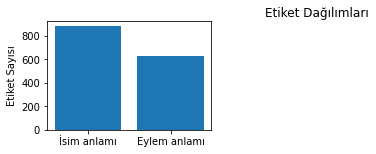

In [ ]:
import matplotlib.pyplot as plt

label_distribution = df['ETIKETLER'].value_counts()
names = ['İsim anlamı', 'Eylem anlamı']
values = [label_distribution[0], label_distribution[1]]

plt.figure(figsize=(10, 2))
plt.subplot(131)
plt.bar(names, values)
plt.suptitle('Etiket Dağılımları')
plt.ylabel('Etiket Sayısı')
plt.show() #verisetindeki etiket dağılımlarını gösteriyoruz

In [ ]:
X=df[['CUMLELER']]
y=df['ETIKETLER']

In [ ]:
X

,CUMLELER
0,Sonra da kahkahalarla gülmeye başladı
1,Aynı şekilde onlara Küçük prensin güler yüzlü...
2,Fil sürüsü fikri onu çok güldürdü
3,Eğer bu bitki yalnızca bir turp ya da bir gül ...
4,yoksa bir süre sonra iyice gül fidelerine benz...
...,...
1505,Seni sersem dedi bana tatlı tatlı gülümseyerek
1506,Ellerinizle aşağıdaki nesneleri tuttuğunuzu ve...
1507,Kestane ve gül kokuyordu bu yatak bir de nane ...
1508,Boğazım yanıyordu kalktım yutkunarak pencere...


In [ ]:
y

0       G2
1       G2
2       G2
3       G1
4       G1
        ..
1505    G2
1506    G1
1507    G1
1508    G2
1509    G2
Name: ETIKETLER, Length: 1510, dtype: object

**%30 Test Olarak Ayrılırsa Gül Verisetiyle Sınıflandırma**

In [ ]:
from sklearn.model_selection import train_test_split

X=df['CUMLELER']#Verisetinde cümlelerin yer aldığı sütun X değişkeninde saklanıyor
y=df['ETIKETLER']#Verisetinde etiketlerin  yer aldığı sütun Y değişkeninde saklanıyor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #verisetini %70 eğitim %30 test olarak ayırıyoruz

In [ ]:
X_train.shape ##dizinin boyutlarını verir.

(1057,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
##Burada eğitim için metin verilerinin vektörleşmesi gerekiyor.Bunun için CountVectorizer kullanılıyor.

In [ ]:
X_train_counts.shape #dizinin boyutlarını verir.

(1057, 5645)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf=tfidf_transformer.fit_transform(X_train_counts)
#vektörlerden oluşan verinin TFIDF featurelara dönüşümü vardır.
#kelimelerden oluşan verilerin sayısal veriye dönüşümü için 2 yöntem kullanılır:Bag of Words ve Embedding Model. Burada verilerin bag of words yöntemi ile değil de direkt TFIDF featurelara dönüşümü TfidTransformer() ile sağlanmıştır.

In [ ]:
X_train_tfidf.shape#Eğitim verisetinin boyutları görüntülenir.

(1057, 5645)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn .feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

text_clf = Pipeline([('tfidf',TfidfVectorizer()),
                     ('clf',KNeighborsClassifier(n_neighbors=5)),])
text_clf.fit(X_train, y_train)
#giriş verilerini bir TF-IDF özellikleri matrisine dönüştüren ve KNN sınıflandırıcı kullanarak test verilerini sınıflandıran basit bir Pipeline nesnesi oluşturuyoruz.
#Daha sonra tüm pipeline fit edilir ve test verilerini tahmin edebiliriz. Sıralı tahmin ediciler oluşturulmuş olur.

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [ ]:
predictions = text_clf.predict(X_test)
#test veriseti kullanılarak tahmin gerçekleştirilir.

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
#Yaptığımız sınıflandırmanın doğruluğunu kontrol etmek için hata matrisi oluşturuyoruz. Hata matrisi için scikit-learn kütüphanesi metrics modülü confusion_matrix fonksiyonunu kullanıyoruz.
#burada 51 yanlış 402 doğru sınıflandırma yapıldığını görüyoruz.

[[164  36]
 [ 15 238]]


In [ ]:
print(metrics.classification_report(y_test,predictions))
#sınıflandırma raporu oluşturulur,burada bazı özel değerler vardır.
#presicion:(kesinlik)Tahminlerin yüzde kaçı doğru çıkmıştır,bunu gösterir.Pozitif olarak tahminlediğimiz değerlerin gerçekten kaç adedinin pozitif olduğunu göstermektedir.
#recall(duyarlılık): bir sınıflandırıcının tüm pozitif örnekleri bulma yeteneğidir. Her sınıf için, gerçek pozitiflerin, gerçek pozitiflerin ve yanlış negatiflerin toplamına oranı olarak tanımlanır.
#f1-score:Pozitif tahminlerin yüzde kaçının doğru olduğunu gösterir.Kesinlik ve duyarlılığın harmonik ortalmasıdır.


              precision    recall  f1-score   support

          G1       0.92      0.82      0.87       200
          G2       0.87      0.94      0.90       253

    accuracy                           0.89       453
   macro avg       0.89      0.88      0.88       453
weighted avg       0.89      0.89      0.89       453



In [ ]:
print(metrics.accuracy_score(y_test,predictions))
#Çok etiketli sınıflandırmada, accuracy score küme doğruluğunu hesaplar: bir numune için tahmin edilen etiket kümesi, y_true içindeki karşılık gelen etiket kümesiyle tam olarak eşleşmelidir.

0.8874172185430463


**%70 Test Olarak Ayrılırsa Gül Verisetiyle Sınıflandırma**

In [ ]:
from sklearn.model_selection import train_test_split

X=df['CUMLELER']#Verisetinde cümlelerin yer aldığı sütun X değişkeninde saklanıyor
y=df['ETIKETLER']#Verisetinde etiketlerin  yer aldığı sütun Y değişkeninde saklanıyor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42) #verisetini %70 test %30 eğitim olarak ayırıyoruz

In [ ]:
X_train.shape
#X_train dizisinin boyutlarını verir.

(453,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
#Burada eğitim için metin verilerinin vektörleşmesi gerekiyor.Bunun için CountVectorizer kullanılıyor.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf=tfidf_transformer.fit_transform(X_train_counts)
#vektörlerden oluşan verinin TFIDF featurelara dönüşümü vardır.
#kelimelerden oluşan verilerin sayısal veriye dönüşümü için 2 yöntem kullanılır:Bag of Words ve Embedding Model. Burada verilerin bag of words yöntemi ile değil de direkt TFIDF featurelara dönüşümü TfidTransformer() ile sağlanmıştır.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn .feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

text_clf = Pipeline([('tfidf',TfidfVectorizer()),
                     ('clf',KNeighborsClassifier(n_neighbors=5)),])
text_clf.fit(X_train, y_train)
#giriş verilerini bir TF-IDF özellikleri matrisine dönüştüren ve KNN sınıflandırıcı kullanarak test verilerini sınıflandıran basit bir Pipeline nesnesi oluşturuyoruz.
#Daha sonra tüm pipeline fit edilir ve test verilerini tahmin edebiliriz. Sıralı tahmin ediciler oluşturulmuş olur.


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [ ]:
predictions = text_clf.predict(X_test)
#test setimiz ile tahminler gerçekleştirilir.

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
#Yaptığımız sınıflandırmanın doğruluğunu kontrol etme yöntemlerinden birisi de hata matrisi oluşturmaktır. Hata matrisi için scikit-learn kütüphanesi metrics modülü confusion_matrix fonksiyonunu kullanıyoruz.
#burada 127 yanlış 930 doğru sınıflandırma yapıldığını görüyoruz.

[[379  78]
 [ 49 551]]


In [ ]:
print(metrics.classification_report(y_test,predictions))
#Sınıflandırma raporu oluşturulur
#presicion:(kesinlik)Tahminlerin yüzde kaçı doğru çıkmıştır,bunu gösterir.Pozitif olarak tahminlediğimiz değerlerin gerçekten kaç adedinin pozitif olduğunu göstermektedir.
#recall(duyarlılık): bir sınıflandırıcının tüm pozitif örnekleri bulma yeteneğidir. Her sınıf için, gerçek pozitiflerin, gerçek pozitiflerin ve yanlış negatiflerin toplamına oranı olarak tanımlanır.
#f1-score:Pozitif tahminlerin yüzde kaçının doğru olduğunu gösterir.Kesinlik ve duyarlılığın harmonik ortalmasıdır.

              precision    recall  f1-score   support

          G1       0.89      0.83      0.86       457
          G2       0.88      0.92      0.90       600

    accuracy                           0.88      1057
   macro avg       0.88      0.87      0.88      1057
weighted avg       0.88      0.88      0.88      1057



In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_test,predictions))
#Çok etiketli sınıflandırmada, accuracy score alt küme doğruluğunu hesaplar: bir numune için tahmin edilen etiket kümesi, y_true içindeki karşılık gelen etiket kümesiyle tam olarak eşleşmelidir.

Accuracy:  0.6197530864197531


**%30 Test Olarak Ayrılırsa Yağ Verisetiyle Sınıflandırma**

In [ ]:
dataset = pd.read_excel('yag_vize.xlsx') #excel dosyasını okuyoruz
dataset #verisetine dair görünüm

,Joe Saul ile Ed arkalarında yağan kar ile eşikte durmuş üstlerini başlarını silkiyorlardı,Y6
0,Sert sürekli bir yel sanki mavi göklerden yağı...,Y6
1,Yaklaşan fırtınada yüzünü acımasızca ısıran su...,Y6
2,Kuzey Okyanusunun balina gemilerinden çıkmış İ...,Y1
3,Üzerine cehennem ateşleri yağdırır gibi bağırı...,Y6
4,Kare şeklinde dizilmiş kulübelerin tam merkezi...,Y1
...,...,...
5202,Ölüden toprağa karışan yağ bir çok insana besi...,Y3
5203,Yağlı bir iş bulmuş torpili içeriden ayarlamıştı,Y5
5204,Üstümüzdeki gök olmasa göktaşları başımıza yağ...,Y6
5205,Buralara kışın öyle bir kar yağar ki insan boy...,Y6


In [ ]:
dataset.to_csv('yag.csv', index=True) #excelden csv dosyasına dönüştürüyoruz

In [ ]:
df = pd.read_csv('yag.csv', sep=',') #csv dosyasını virgüllere göre ayırarak okuyoruz
df.columns=["NUMARA", "CUMLELER", "ETIKETLER"] #sütunları isimlendiriyoruz
df.head()#Nesnemizin içerisinde doğru türde veri olup olmadığını hızlı bir şekilde test ediyoruz.

,NUMARA,CUMLELER,ETIKETLER
0,0,Sert sürekli bir yel sanki mavi göklerden yağı...,Y6
1,1,Yaklaşan fırtınada yüzünü acımasızca ısıran su...,Y6
2,2,Kuzey Okyanusunun balina gemilerinden çıkmış İ...,Y1
3,3,Üzerine cehennem ateşleri yağdırır gibi bağırı...,Y6
4,4,Kare şeklinde dizilmiş kulübelerin tam merkezi...,Y1


In [ ]:
for fn in df.keys():#verisetindeki sütun adlarına sahip bir index nesnesi döndürür.Index nesnesi, sütun adlarını liste öğeleri olarak içeren bir liste gibidir.
  print('User uploaded file  "{name}" with length {length} bytes'.format(name=fn, length=len(df[fn])))#dosyadaki sütun adları ve bu sütunlar altındaki veri sayısı görüntülenir.

User uploaded file  "NUMARA" with length 5207 bytes
User uploaded file  "CUMLELER" with length 5207 bytes
User uploaded file  "ETIKETLER" with length 5207 bytes


In [ ]:
bool_series = pd.isnull(df['CUMLELER']) #cümleler arasında değer atanmamış etiket satırı varsa ilgili bilgileri bir diziye atıyoruz
df[bool_series] #ardından gösteriyoruz

,NUMARA,CUMLELER,ETIKETLER


In [ ]:
bool_series = pd.isnull(df['ETIKETLER']) #etiketler arasında değer atanmamış veri satırı varsa ilgili bilgileri bir diziye atıyoruz
df[bool_series] #ardından gösteriyoruz

,NUMARA,CUMLELER,ETIKETLER


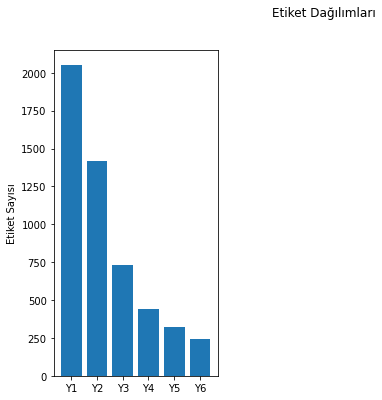

In [ ]:
label_distribution = df['ETIKETLER'].value_counts()
names = ['Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6']
values = [label_distribution[0], label_distribution[1], label_distribution[2], label_distribution[3], label_distribution[4], label_distribution[5]]

plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.bar(names, values)
plt.suptitle('Etiket Dağılımları')
plt.ylabel('Etiket Sayısı')
plt.show() #verisetindeki etiket dağılımlarını gösteriyoruz

In [ ]:
X=df[['CUMLELER']]
y=df['ETIKETLER']

In [ ]:
X=df['CUMLELER']#Verisetinde cümlelerin yer aldığı sütun X değişkeninde saklanıyor
y=df['ETIKETLER']#Verisetinde etiketlerin  yer aldığı sütun Y değişkeninde saklanıyor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #verisetini %70 eğitim %30 test olarak ayırıyoruz

In [ ]:
count_vect=CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
##Burada eğitim için metin verilerinin vektörleşmesi gerekiyor.Bunun için CountVectorizer kullanılıyor.

In [ ]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf=tfidf_transformer.fit_transform(X_train_counts)
#vektörlerden oluşan verinin TFIDF featurelara dönüşümü vardır.
#kelimelerden oluşan verilerin sayısal veriye dönüşümü için 2 yöntem kullanılır:Bag of Words ve Embedding Model. Burada verilerin bag of words yöntemi ile değil de direkt TFIDF featurelara dönüşümü TfidTransformer() ile sağlanmıştır.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn .feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

text_clf = Pipeline([('tfidf',TfidfVectorizer()),
                     ('clf',KNeighborsClassifier(n_neighbors=5)),])
text_clf.fit(X_train, y_train)
#giriş verilerini bir TF-IDF özellikleri matrisine dönüştüren ve KNN sınıflandırıcı kullanarak test verilerini sınıflandıran basit bir Pipeline nesnesi oluşturuyoruz.
#Daha sonra tüm pipeline fit edilir ve test verilerini tahmin edebiliriz. Sıralı tahmin ediciler oluşturulmuş olur.

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [ ]:
predictions = text_clf.predict(X_test)
#test veriseti kullanılarak tahmin gerçekleştirilir.

In [ ]:
print(metrics.confusion_matrix(y_test,predictions))
#Yaptığımız sınıflandırmanın doğruluğunu kontrol etme yöntemlerinden birisi de hata matrisi oluşturmaktır. Hata matrisi için scikit-learn kütüphanesi metrics modülü confusion_matrix fonksiyonunu kullanıyoruz.
#burada 127 yanlış 930 doğru sınıflandırma yapıldığını görüyoruz.

[[307  31  17  20   1  67]
 [ 69  80   4   7   1  54]
 [ 43   7  18   5   0  24]
 [ 40  15   6  50   1   6]
 [ 17   3   1   2  18  37]
 [ 29   7   6   5  10 555]]


In [ ]:
print(metrics.classification_report(y_test,predictions))
#Sınıflandırma raporu oluşturulur
#presicion:(kesinlik)Tahminlerin yüzde kaçı doğru çıkmıştır,bunu gösterir.Pozitif olarak tahminlediğimiz değerlerin gerçekten kaç adedinin pozitif olduğunu göstermektedir.
#recall(duyarlılık): bir sınıflandırıcının tüm pozitif örnekleri bulma yeteneğidir. Her sınıf için, gerçek pozitiflerin, gerçek pozitiflerin ve yanlış negatiflerin toplamına oranı olarak tanımlanır.
#f1-score:Pozitif tahminlerin yüzde kaçının doğru olduğunu gösterir.Kesinlik ve duyarlılığın harmonik ortalmasıdır.

              precision    recall  f1-score   support

          Y1       0.61      0.69      0.65       443
          Y2       0.56      0.37      0.45       215
          Y3       0.35      0.19      0.24        97
          Y4       0.56      0.42      0.48       118
          Y5       0.58      0.23      0.33        78
          Y6       0.75      0.91      0.82       612

    accuracy                           0.66      1563
   macro avg       0.57      0.47      0.49      1563
weighted avg       0.63      0.66      0.63      1563



In [ ]:
print(metrics.accuracy_score(y_test,predictions))
#Çok etiketli sınıflandırmada, accuracy score küme doğruluğunu hesaplar: bir numune için tahmin edilen etiket kümesi, y_true içindeki karşılık gelen etiket kümesiyle tam olarak eşleşmelidir.

0.6577095329494562


**%70 Test Olarak Ayrılırsa Yağ Verisetiyle Sınıflandırma**

In [ ]:
dataset = pd.read_excel('yag_vize.xlsx') #excel dosyasını okuyoruz
dataset #verisetine dair görünüm

,Joe Saul ile Ed arkalarında yağan kar ile eşikte durmuş üstlerini başlarını silkiyorlardı,Y6
0,Sert sürekli bir yel sanki mavi göklerden yağı...,Y6
1,Yaklaşan fırtınada yüzünü acımasızca ısıran su...,Y6
2,Kuzey Okyanusunun balina gemilerinden çıkmış İ...,Y1
3,Üzerine cehennem ateşleri yağdırır gibi bağırı...,Y6
4,Kare şeklinde dizilmiş kulübelerin tam merkezi...,Y1
...,...,...
5202,Ölüden toprağa karışan yağ bir çok insana besi...,Y3
5203,Yağlı bir iş bulmuş torpili içeriden ayarlamıştı,Y5
5204,Üstümüzdeki gök olmasa göktaşları başımıza yağ...,Y6
5205,Buralara kışın öyle bir kar yağar ki insan boy...,Y6


In [ ]:
dataset.to_csv('yag.csv', index=True) #excelden csv dosyasına dönüştürüyoruz

In [ ]:
df = pd.read_csv('yag.csv', sep=',') #csv dosyasını virgüllere göre ayırarak okuyoruz
df.columns=["NUMARA", "CUMLELER", "ETIKETLER"] #sütunları isimlendiriyoruz
df.head()#Nesnemizin içerisinde doğru türde veri olup olmadığını hızlı bir şekilde test ediyoruz.

,NUMARA,CUMLELER,ETIKETLER
0,0,Sert sürekli bir yel sanki mavi göklerden yağı...,Y6
1,1,Yaklaşan fırtınada yüzünü acımasızca ısıran su...,Y6
2,2,Kuzey Okyanusunun balina gemilerinden çıkmış İ...,Y1
3,3,Üzerine cehennem ateşleri yağdırır gibi bağırı...,Y6
4,4,Kare şeklinde dizilmiş kulübelerin tam merkezi...,Y1


In [ ]:
for fn in df.keys():#verisetindeki sütun adlarına sahip bir index nesnesi döndürür.Index nesnesi, sütun adlarını liste öğeleri olarak içeren bir liste gibidir.
  print('User uploaded file  "{name}" with length {length} bytes'.format(name=fn, length=len(df[fn])))#dosyadaki sütun adları ve bu sütunlar altındaki veri sayısı görüntülenir.

User uploaded file  "NUMARA" with length 5207 bytes
User uploaded file  "CUMLELER" with length 5207 bytes
User uploaded file  "ETIKETLER" with length 5207 bytes


In [ ]:
X=df[['CUMLELER']]
y=df['ETIKETLER']

In [ ]:
X=df['CUMLELER']#Verisetinde cümlelerin yer aldığı sütun X değişkeninde saklanıyor
y=df['ETIKETLER']#Verisetinde etiketlerin  yer aldığı sütun Y değişkeninde saklanıyor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42) #verisetini %70 eğitim %30 test olarak ayırıyoruz

In [ ]:
count_vect=CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
##Burada eğitim için metin verilerinin vektörleşmesi gerekiyor.Bunun için CountVectorizer kullanılıyor.

In [ ]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf=tfidf_transformer.fit_transform(X_train_counts)
#vektörlerden oluşan verinin TFIDF featurelara dönüşümü vardır.
#kelimelerden oluşan verilerin sayısal veriye dönüşümü için 2 yöntem kullanılır:Bag of Words ve Embedding Model. Burada verilerin bag of words yöntemi ile değil de direkt TFIDF featurelara dönüşümü TfidTransformer() ile sağlanmıştır.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn .feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

text_clf = Pipeline([('tfidf',TfidfVectorizer()),
                     ('clf',KNeighborsClassifier(n_neighbors=5)),])
text_clf.fit(X_train, y_train)
#giriş verilerini bir TF-IDF özellikleri matrisine dönüştüren ve KNN sınıflandırıcı kullanarak test verilerini sınıflandıran basit bir Pipeline nesnesi oluşturuyoruz.
#Daha sonra tüm pipeline fit edilir ve test verilerini tahmin edebiliriz. Sıralı tahmin ediciler oluşturulmuş olur.

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [ ]:
predictions = text_clf.predict(X_test)
#test veriseti kullanılarak tahmin gerçekleştirilir.

In [ ]:
print(metrics.confusion_matrix(y_test,predictions))
#Yaptığımız sınıflandırmanın doğruluğunu kontrol etme yöntemlerinden birisi de hata matrisi oluşturmaktır. Hata matrisi için scikit-learn kütüphanesi metrics modülü confusion_matrix fonksiyonunu kullanıyoruz.
#burada 127 yanlış 930 doğru sınıflandırma yapıldığını görüyoruz.

[[ 601  109   24   62    1  224]
 [ 135  187    9   21    3  142]
 [  85   28   44   12    2   60]
 [  87   40    6  109    0   46]
 [  25   23    0    5   20  103]
 [  67   32    6   19   10 1298]]


In [ ]:
print(metrics.classification_report(y_test,predictions))
#Sınıflandırma raporu oluşturulur
#presicion:(kesinlik)Tahminlerin yüzde kaçı doğru çıkmıştır,bunu gösterir.Pozitif olarak tahminlediğimiz değerlerin gerçekten kaç adedinin pozitif olduğunu göstermektedir.
#recall(duyarlılık): bir sınıflandırıcının tüm pozitif örnekleri bulma yeteneğidir. Her sınıf için, gerçek pozitiflerin, gerçek pozitiflerin ve yanlış negatiflerin toplamına oranı olarak tanımlanır.
#f1-score:Pozitif tahminlerin yüzde kaçının doğru olduğunu gösterir.Kesinlik ve duyarlılığın harmonik ortalmasıdır.

              precision    recall  f1-score   support

          Y1       0.60      0.59      0.59      1021
          Y2       0.45      0.38      0.41       497
          Y3       0.49      0.19      0.28       231
          Y4       0.48      0.38      0.42       288
          Y5       0.56      0.11      0.19       176
          Y6       0.69      0.91      0.79      1432

    accuracy                           0.62      3645
   macro avg       0.54      0.43      0.45      3645
weighted avg       0.60      0.62      0.59      3645



In [ ]:
print(metrics.accuracy_score(y_test,predictions))
#Çok etiketli sınıflandırmada, accuracy score küme doğruluğunu hesaplar: bir numune için tahmin edilen etiket kümesi, y_true içindeki karşılık gelen etiket kümesiyle tam olarak eşleşmelidir.

0.6197530864197531
